In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
matches_df = pd.read_csv("C:/Users/hp/Documents/matches.csv")
deliveries_df = pd.read_csv("C:/Users/hp/Documents/deliveries.csv")

In [3]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches_df.shape

(756, 18)

In [6]:
matches_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
deliveries_df.shape

(179078, 21)

In [8]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [9]:
matches_df.isna().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
deliveries_df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [11]:
matches_df.drop(['umpire3'],axis=1,inplace=True)

In [12]:
matches_df.isna().sum()[matches_df.isna().sum()>0]

city               7
winner             4
player_of_match    4
umpire1            2
umpire2            2
dtype: int64

In [13]:
# columns having the nan value 

matches_df[matches_df.isna().sum()[matches_df.isna().sum()>0].index.tolist()]

,city,winner,player_of_match,umpire1,umpire2
0,Hyderabad,Sunrisers Hyderabad,Yuvraj Singh,AY Dandekar,NJ Llong
1,Pune,Rising Pune Supergiant,SPD Smith,A Nand Kishore,S Ravi
2,Rajkot,Kolkata Knight Riders,CA Lynn,Nitin Menon,CK Nandan
3,Indore,Kings XI Punjab,GJ Maxwell,AK Chaudhary,C Shamshuddin
4,Bangalore,Royal Challengers Bangalore,KM Jadhav,NaN,NaN
...,...,...,...,...,...
751,Mumbai,Mumbai Indians,HH Pandya,Nanda Kishore,O Nandan
752,Chennai,Mumbai Indians,AS Yadav,Nigel Llong,Nitin Menon
753,Visakhapatnam,Delhi Capitals,RR Pant,NaN,NaN
754,Visakhapatnam,Chennai Super Kings,F du Plessis,Sundaram Ravi,Bruce Oxenford


In [14]:
'''
> The winner is Nan only for those matches when there is draw
> The player of the match is Nan only for those matches that were draw
> City Nan value is Dubai
> Umpire1 and Umpire2 are unknown for some matches

'''

matches_df[matches_df.isna().any(axis=1)]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak


In [15]:
# Filling Nan with 'Dubai' in 'city' column 
matches_df['city'].fillna(value='Dubai',inplace=True)

# Filling Nans with 'None' in 'player_of_match' column
matches_df['player_of_match'].fillna(value='None',inplace=True)

# Fillig Nans with 'Draw' in 'winner' column
matches_df['winner'].fillna(value='Draw',inplace=True)

# Filling Nans of 'umpire1' and 'umpire2' with 'ffill' method
matches_df['umpire1'].ffill(axis=0,inplace=True)
matches_df['umpire2'].ffill(axis=0,inplace=True)

In [16]:
matches_df.isna().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [17]:
# List of teams who played frequently in almost all seasons

teams=['Royal Challengers Bangalore','Kolkata Knight Riders', 'Kings XI Punjab','Sunrisers Hyderabad',
       'Mumbai Indians' ,'Rajasthan Royals','Chennai Super Kings','Delhi Capitals'
]

In [18]:
matches_df['team1'] = matches_df['team1'].str.replace('Deccan Chargers' , 'Sunrisers Hyderabad')
matches_df['team2'] = matches_df['team2'].str.replace('Deccan Chargers' , 'Sunrisers Hyderabad')

matches_df['team1'] = matches_df['team1'].str.replace('Delhi Daredevils' , 'Delhi Capitals')
matches_df['team2'] = matches_df['team2'].str.replace('Delhi Daredevils' , 'Delhi Capitals')

matches_df['winner'] = matches_df['winner'].str.replace('Deccan Chargers' , 'Sunrisers Hyderabad')
matches_df['winner'] = matches_df['winner'].str.replace('Delhi Daredevils' , 'Delhi Capitals')

deliveries_df['batting_team'] = deliveries_df['batting_team'].str.replace('Deccan Chargers' , 'Sunrisers Hyderabad')
deliveries_df['batting_team'] = deliveries_df['batting_team'].str.replace('Delhi Daredevils' , 'Delhi Capitals')
deliveries_df['bowling_team'] = deliveries_df['bowling_team'].str.replace('Deccan Chargers' , 'Sunrisers Hyderabad')
deliveries_df['bowling_team'] = deliveries_df['bowling_team'].str.replace('Delhi Daredevils' , 'Delhi Capitals')

In [19]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [20]:
matches_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants'], dtype=object)

In [21]:
matches_df = matches_df[matches_df['team1'].isin(teams)]
matches_df = matches_df[matches_df['team2'].isin(teams)]

deliveries_df=deliveries_df[deliveries_df['batting_team'].isin(teams)]
deliveries_df=deliveries_df[deliveries_df['bowling_team'].isin(teams)]

In [22]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [23]:
deliveries_df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Delhi Capitals', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [24]:
# Calculating the cumulative runs by ball for each inning and match

deliveries_df['runs_cumsum'] = deliveries_df.groupby(['match_id','inning']).cumsum()['total_runs'].values



In [25]:
#  Limiting the ball count to 6 per over

deliveries_df.loc[deliveries_df['ball'][deliveries_df['ball']>6].index.tolist(),'ball'] = 6

In [26]:
# Evaluating the Current Run rate

''' Current Run Rate = (Total Runs) / (Number of Overs + (Number of balls/6))
'''

deliveries_df['curr_run_rate'] = deliveries_df['runs_cumsum'] / ((deliveries_df['over']-1)+deliveries_df['ball']/6)

In [27]:
# total number of balls delivered
deliveries_df['total_balls']=(deliveries_df['over']-1)*6 + deliveries_df['ball']

# total number of balls left
deliveries_df['balls_left'] = 120 - deliveries_df['total_balls']

In [28]:
#  for wickets fall
not_out_indv = deliveries_df[deliveries_df['player_dismissed'].isna()].index.tolist()
out_indv = deliveries_df.loc[~deliveries_df['player_dismissed'].index.isin(not_out_indv),'player_dismissed'].index.tolist()

# Specifying 0 value to the not out
deliveries_df.loc[not_out_indv,'wicket_fall'] = 0
# Specifying 1 value to the out
deliveries_df.loc[out_indv,'wicket_fall'] = 1

# we evaluate the total wickets fell down till ball for eavh innings
deliveries_df['wicket_fall'] = deliveries_df.groupby(['match_id','inning']).cumsum()['wicket_fall'].values.tolist()


In [29]:
# Labelling 'Out' and 'Not Out'

deliveries_df.loc[not_out_indv,'player_dismissed'] = 'Not Out'


x = deliveries_df['player_dismissed'] == 'Not Out'
deliveries_df.loc[x[x].index,'is_wicket'] = 0
x = deliveries_df['player_dismissed'] != 'Not Out'
deliveries_df.loc[x[x].index,'is_wicket'] = 1

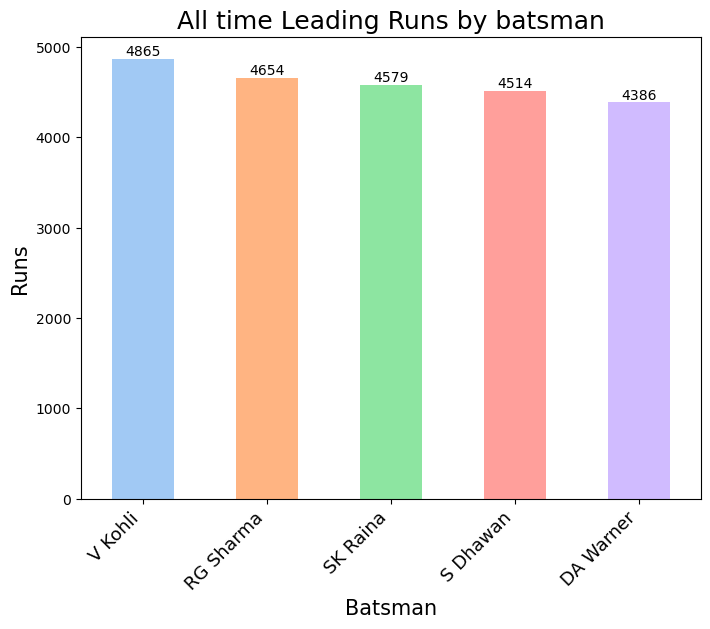

In [30]:
# Top 5 runs scorer
plt.figure(figsize=(8,6))
x = pd.Series(deliveries_df.groupby('batsman').sum()['total_runs']).nlargest(5)
labels = x.values
colors = sns.color_palette('pastel')
ax = x.plot(kind='bar',color=colors)
plt.title('All time Leading Runs by batsman',fontsize=18)
plt.ylabel('Runs',fontsize=15)
plt.xlabel('Batsman',fontsize=15)
plt.xticks(rotation=45,ha='right',fontsize=13)
plt.bar_label(ax.containers[0],labels=labels)
plt.show()

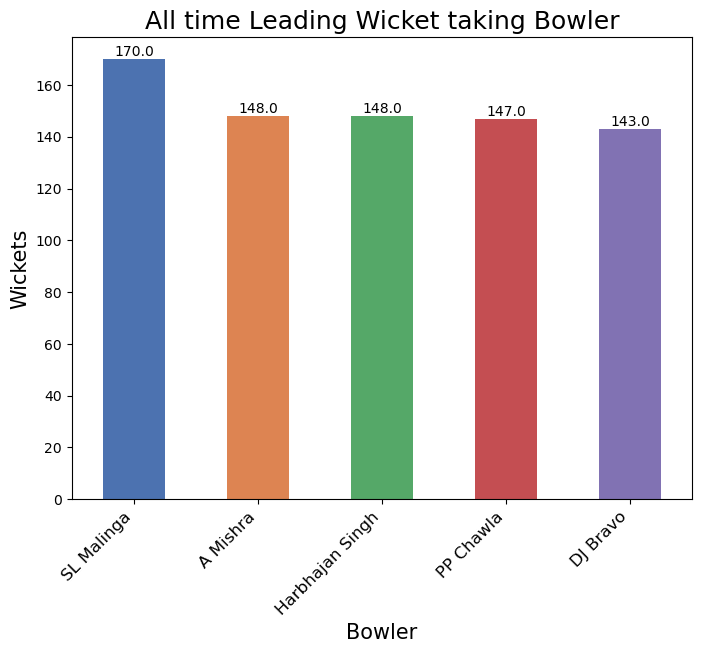

In [31]:
# Top 5 wickets taker
plt.figure(figsize=(8,6))
x = pd.Series(deliveries_df.groupby('bowler').sum()['is_wicket']).nlargest(5)
labels = x.values
colors = sns.color_palette('deep')
ax = x.plot(kind='bar',color=colors)
plt.title('All time Leading Wicket taking Bowler',fontsize=18)
plt.ylabel('Wickets',fontsize=15)
plt.xlabel('Bowler',fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.bar_label(ax.containers[0],labels=labels)
plt.show()

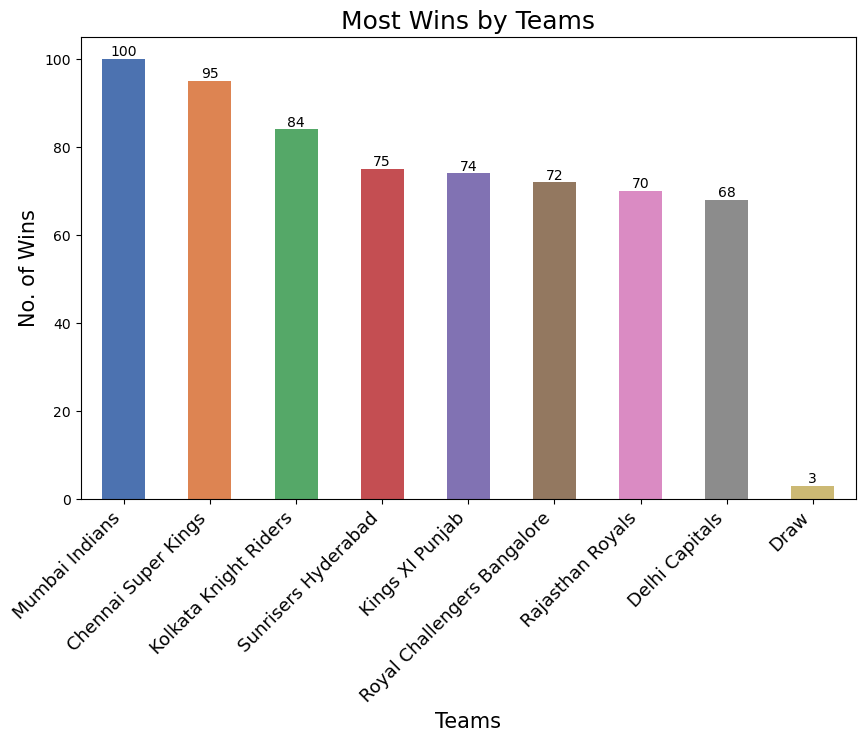

In [32]:
# Most wins by teams

x = matches_df['winner'].value_counts()
labels= x.values
colors = sns.color_palette(palette='deep')
plt.figure(figsize=(10,6))
ax = x.plot(kind='bar',color=colors)
plt.title('Most Wins by Teams',fontsize=18)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('No. of Wins',fontsize=15)
plt.xticks(rotation=45,ha='right',fontsize=13)
plt.bar_label(ax.containers[0],labels=labels)
plt.show()

In [33]:
# Most wins by Runs

matches_df[['winner','win_by_runs']].nlargest(columns=['win_by_runs'],n=5)


,winner,win_by_runs
43,Mumbai Indians,146
59,Kolkata Knight Riders,140
556,Royal Challengers Bangalore,138
706,Sunrisers Hyderabad,118
295,Kings XI Punjab,111


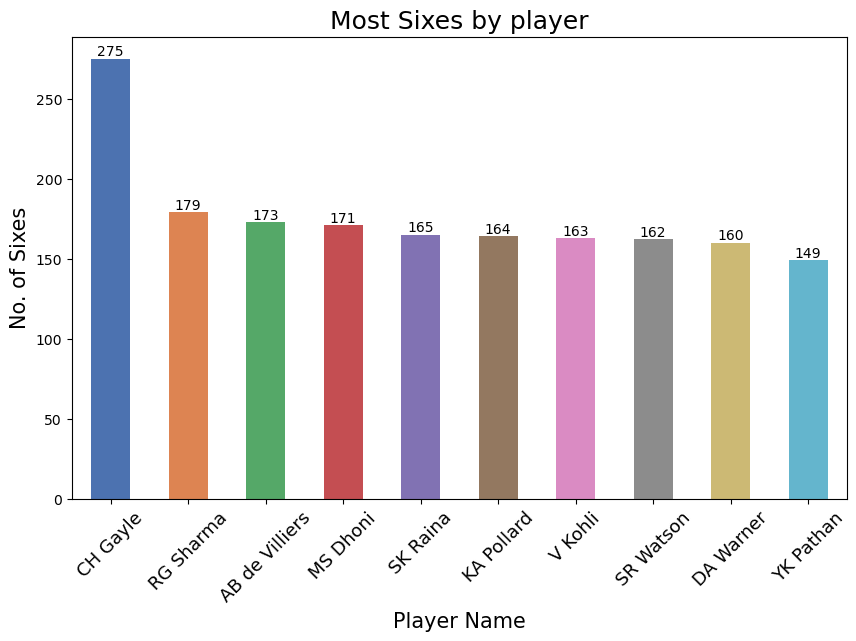

In [34]:
# Player hitting Most Sixes
x = deliveries_df['total_runs'] == 6
x = pd.Series(deliveries_df.loc[x[x].index,'batsman'].value_counts()).nlargest(10)
labels = x.values
colors = sns.color_palette(palette='deep')
plt.figure(figsize = (10,6))
ax = x.plot(kind='bar',color = colors)
plt.title('Most Sixes by player',fontsize=18)
plt.xlabel('Player Name',fontsize=15)
plt.ylabel('No. of Sixes',fontsize=15)
plt.bar_label(ax.containers[0],labels=labels)
plt.xticks(rotation=45,fontsize=13)
plt.show()

## We prepare a Dataframe for the model 

In [35]:
final_df = deliveries_df[['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball','total_runs', 'runs_cumsum', 'curr_run_rate',
       'total_balls', 'balls_left', 'wicket_fall']]

In [36]:
# Evaluating the target given by the batting team
x = deliveries_df.groupby(['match_id','inning']).sum().reset_index()
target = x[x['inning']==1][['match_id','total_runs']]
target['target_run'] = target['total_runs'].apply(lambda x:x+1)
final_df = pd.merge(left=final_df,right=target,on='match_id')

In [37]:
'''
Since, win predictions comes into play only in the second inning
Therefore, we shall consider 2nd innings from now onwards
'''
final_df = final_df[final_df['inning']==2]

In [38]:
# Evaluating the run left and the wickets left
final_df['runs_left'] = final_df['target_run'] - final_df['runs_cumsum']
final_df['wickets_left'] = 10 - final_df['wicket_fall']

In [39]:
final_df = final_df.reset_index().drop('index',axis=1)

In [40]:
final_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'total_runs_x', 'runs_cumsum', 'curr_run_rate', 'total_balls',
       'balls_left', 'wicket_fall', 'total_runs_y', 'target_run', 'runs_left',
       'wickets_left'],
      dtype='object')

In [41]:
'''
For a team scoring more than required the Reqd. runs may become Negative
> To fix it, we adjust the minimum value of runs left to zero
'''
x = final_df['runs_left']<=0
final_df.loc[x[x].index.tolist(),['runs_left']] = 0

In [42]:
# Evaluating the Required Run Rate (RRR)
final_df['Req_run_rate'] = (final_df['runs_left'] * 6)/(final_df['balls_left'])
'''
Since, for zero runs reqd ; balls left can be zero therefore the RRR might become Nans
> To fix this issue we fill the Nans of RRR with the previous observation
'''

final_df.isna().sum()[final_df.isna().sum()>0]

Req_run_rate    27
dtype: int64

In [43]:
# Filling the Nans of the RRR
final_df['Req_run_rate'].fillna(method='ffill',inplace=True)

In [44]:
x = final_df['Req_run_rate'] == np.inf
ind = x[x].index.tolist()
for i in ind:
    final_df.loc[i,'Req_run_rate'] = final_df.loc[i - 1,'Req_run_rate']

In [45]:
# Renaming some columns

final_df.rename(columns={'total_runs_x':'run_scored','target_run':'target'},inplace=True)
final_df.drop('total_runs_y',axis=1,inplace=True)

In [46]:
''' Finding the Winner of the match '''

winner = matches_df[['id','winner']]
final_df = pd.merge(left=final_df,right=winner,right_on='id',left_on='match_id')
final_df.drop('id',axis=1,inplace=True)

In [47]:
x = final_df['winner'] == 'Draw'
ind = x[x].index.tolist()
final_df.drop(index=ind,axis=0,inplace=True)

In [48]:
# If the batting wins in second innings, we label it '1'
x = final_df['batting_team'] == final_df['winner']
final_df.loc[x[x].index.tolist(),'winner'] = 1
# If bowling team wins in second inning, we label it '0'
x = final_df['bowling_team'] == final_df['winner']
final_df.loc[x[x].index.tolist(),'winner'] = 0

In [49]:
final_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,run_scored,runs_cumsum,curr_run_rate,total_balls,balls_left,wicket_fall,target,runs_left,wickets_left,Req_run_rate,winner
0,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,1,1,6.0,1,119,0.0,208,207,10.0,10.436975,0
1,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,0,1,3.0,2,118,0.0,208,207,10.0,10.525424,0
2,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,0,1,2.0,3,117,0.0,208,207,10.0,10.615385,0


In [50]:
# LabelEncoding the Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['batting_team'] = le.fit_transform(final_df['batting_team'])
final_df['bowling_team'] = le.fit_transform(final_df['bowling_team'])

In [51]:
#features = ['batting_team', 'bowling_team','balls_left',  'target', 'runs_left', 'wickets_left']
# We select the 'winner' as the target variable.
Y = final_df['winner']
# Now
X = final_df[[i for i in final_df.columns if i not in  ['winner','match_id','inning']]]

In [52]:
Y = Y.astype(int)
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 73277 entries, 0 to 73303
Series name: winner
Non-Null Count  Dtype
--------------  -----
73277 non-null  int32
dtypes: int32(1)
memory usage: 2.9 MB


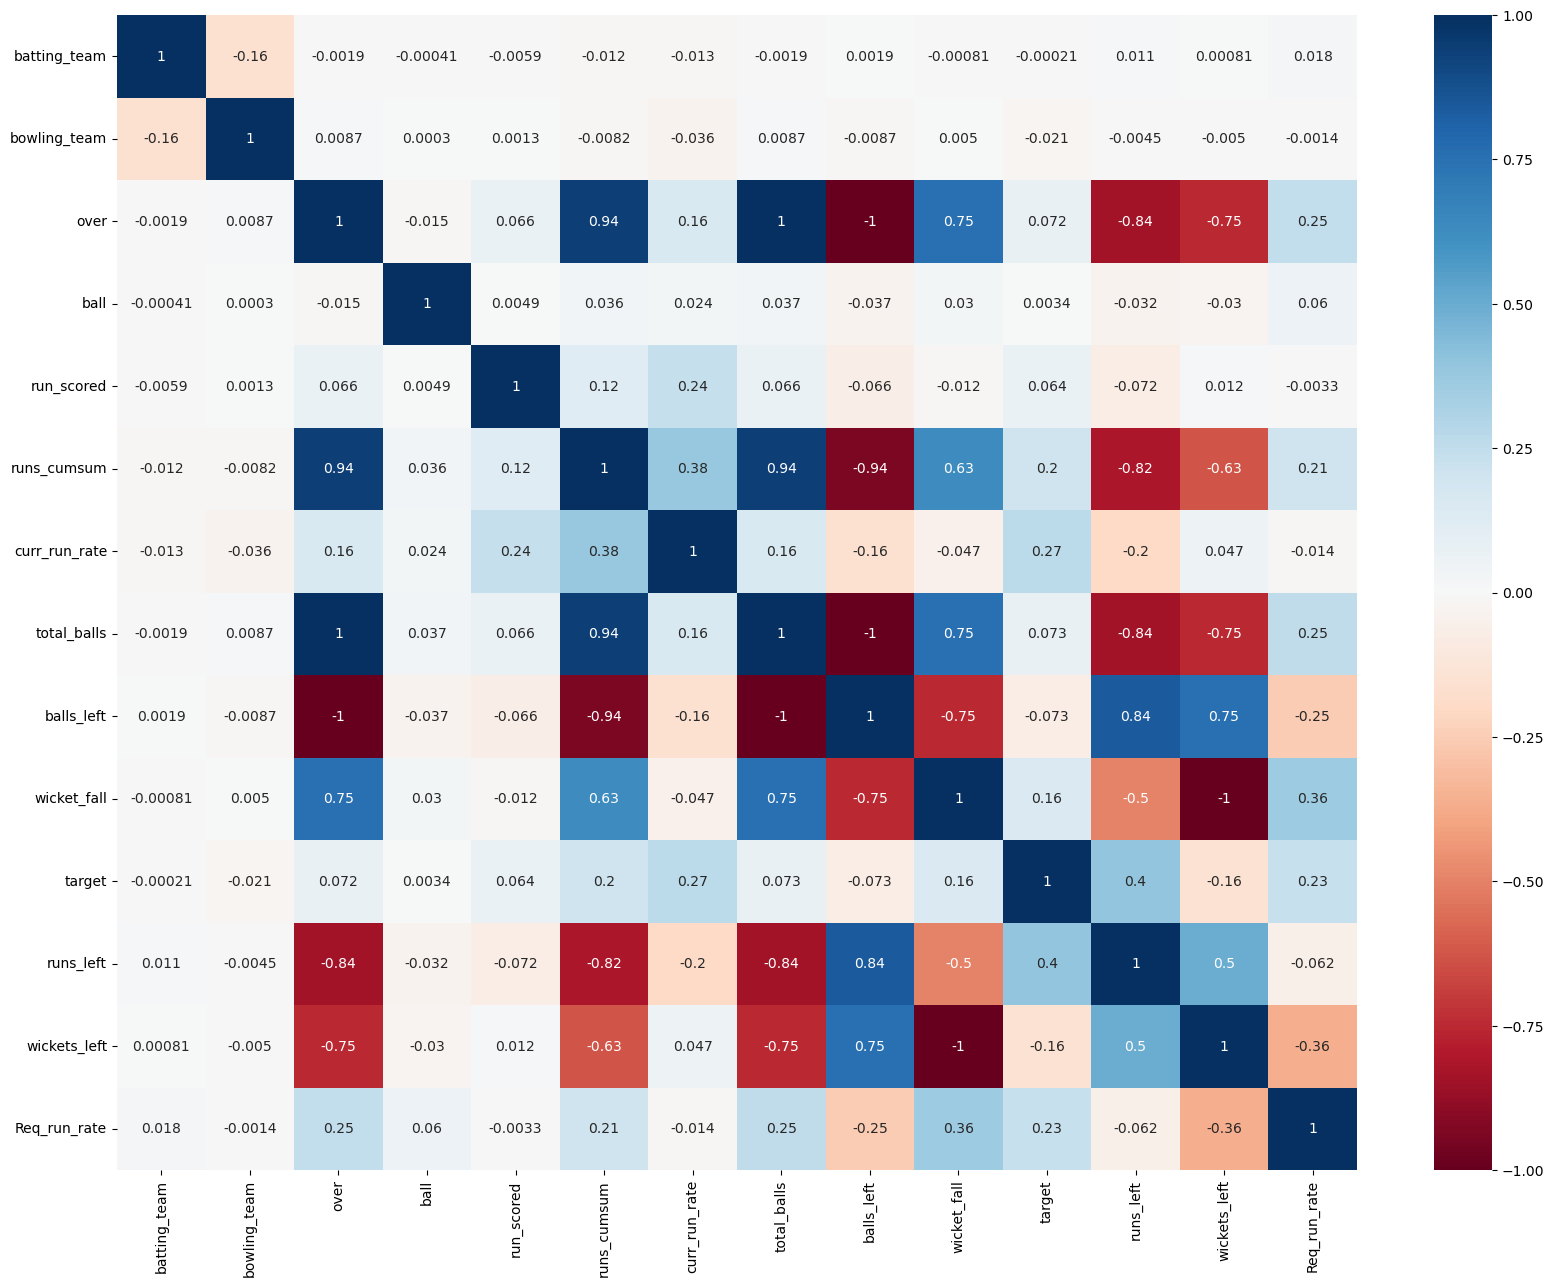

In [53]:
plt.figure(figsize=(20,15))
sns.heatmap( X.corr(),cmap='RdBu',annot=True,center=0)
plt.show()

#### Based on above corelation matrix we delete the highly corelated features:

'over','runs_cumsum','total_balls','balls_left','wicket_fall'

### Features finalized:
 'batting_team','bowling_team','run_scored','curr_run_rate','target','wickets_left', 'Req_run_rate','runs_left'

In [54]:
X = final_df[[ 'batting_team','bowling_team','run_scored','curr_run_rate',
              'target','wickets_left', 'Req_run_rate','runs_left']]

<AxesSubplot:>

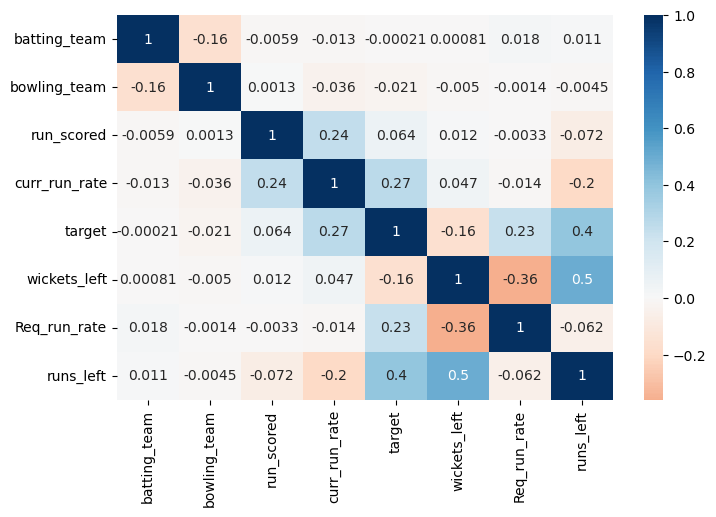

In [55]:
# Finally we can see that highly corelated variables are dropped
plt.figure(figsize = (8,5))
sns.heatmap(X.corr(),cmap='RdBu',center=0,annot=True)

In [56]:
# Splitting Data into Training set and Test set
train_X = X.sample(frac=0.9,random_state=0)
train_Y = Y.loc[train_X.index]
test_X = X.drop(train_X.index)
test_Y = Y.drop(train_X.index)

In [57]:
# Saving the mean and Std. Deviation of each columns for future use
import pickle
scaler_data = pd.DataFrame({'Mean':train_X.mean().values,'SD':train_X.std().values},
                          index=train_X.columns)
pickle.dump(scaler_data,open('scaler_data.pkl','wb'))

In [58]:
# Scaling the Data for better fit
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = pd.DataFrame(scaler.fit_transform(train_X),columns=train_X.columns,index=train_X.index)
scaler = StandardScaler()
test_X = pd.DataFrame(scaler.fit_transform(test_X),columns=test_X.columns,index=test_X.index)

In [59]:
# Fitting the model on K-fold CV for Train set

from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=0)
lg = LogisticRegression(random_state=0,max_iter=5000)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()


model=[rf,lg,dt,knn]
accuracy_scores = []
mean_acc=[]
std_acc=[]
rmse_scores=[]
mean_rmse=[]
# Perform k-fold cross-validation
for i in model:
    for train_index, test_index in kf.split(train_X):
        X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
        Y_train, Y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

        i.fit(X_train, Y_train)
        Y_pred = i.predict(X_test)
        # Calculate and store the accuracy for this fold
        accuracy = accuracy_score(Y_test, Y_pred)
        rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
        accuracy_scores.append(accuracy)
        rmse_scores.append(rmse)
    mean_acc.append(np.mean(accuracy_scores))
    mean_rmse.append(np.mean(rmse))

train_model_CV = pd.DataFrame({'RMSE_CV':mean_rmse,'Accuracy_CV':mean_acc},
                              index=['RandomForest','LogisticRegression','DescisionTree','KNN'])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [60]:
# Testing the model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix,classification_report

model=[rf,lg,dt,knn]
RMSE=[]
score=[]
acc = []
for i in model:
    Y_predict2 = i.predict(test_X)
    RMSE.append(np.sqrt(mean_squared_error(test_Y,Y_predict2)))
    score.append(i.score(test_X,test_Y))

test_model = pd.DataFrame({'RMSE_test':RMSE,'Accuracy_test':score},
                          index=['RandomForest','LogisticRegression','DescisionTree','KNN'])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [61]:
# Model Comparision Between Train Models and Test Models
model_metrics = train_model_CV.join(test_model)
model_metrics

,RMSE_CV,Accuracy_CV,RMSE_test,Accuracy_test
RandomForest,0.093378,0.992221,0.130606,0.982942
LogisticRegression,0.483483,0.882538,0.476093,0.773335
DescisionTree,0.164293,0.912498,0.219480,0.951829
KNN,0.273560,0.916253,0.278898,0.922216


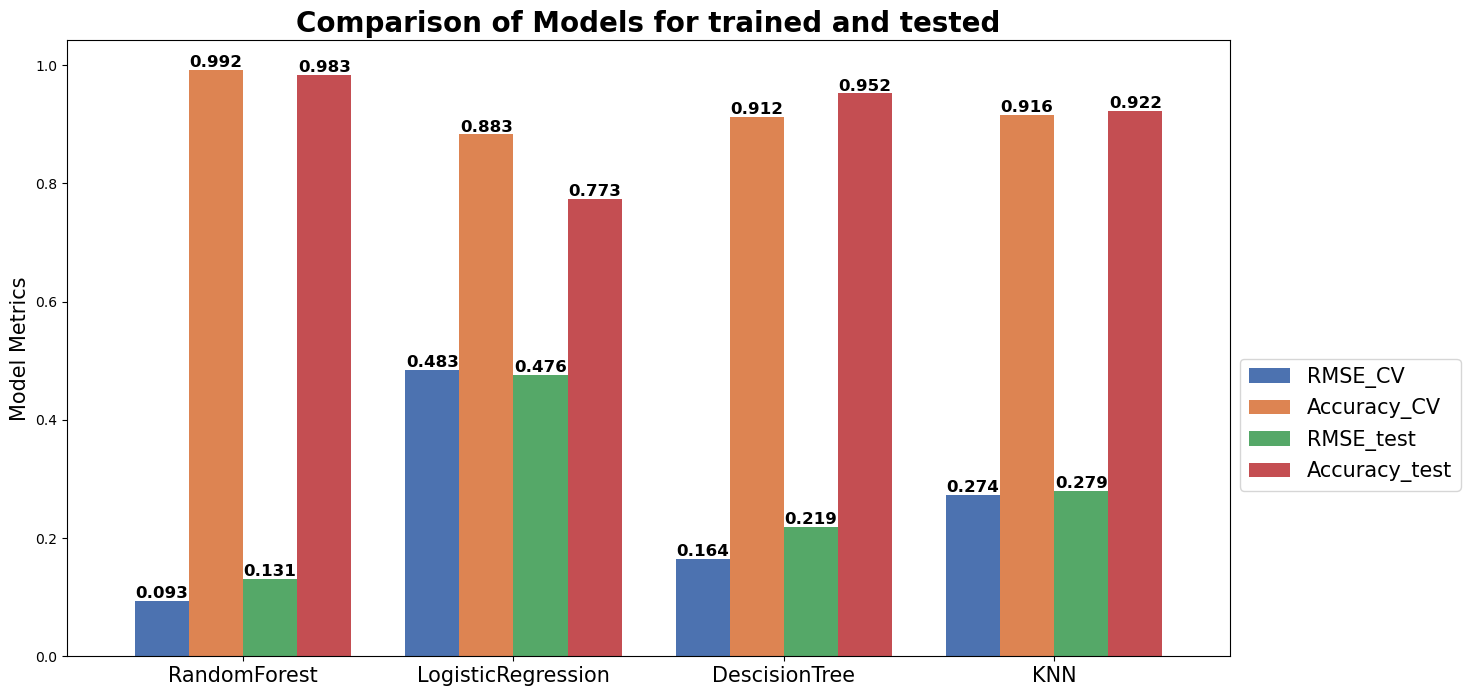

In [62]:
import matplotlib.pyplot as plt
colors = sns.color_palette(palette='deep')
ax = model_metrics.plot(kind='bar', figsize=(15, 8), color=colors, width=0.8)
plt.title('Comparison of Models for trained and tested', fontsize=20, fontweight='bold')
plt.ylabel('Model Metrics', fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.legend(bbox_to_anchor=(1, 0.5), loc='upper left', fontsize=15)
for container in ax.containers:
    ax.bar_label(container, labels=[round(h,3) for h in container.datavalues],
                 label_type='edge', fontsize=12,fontweight='bold')
plt.show()

Epoch 1/50
1855/1855 [==============================] - 141s 75ms/step - loss: 0.4531 - accuracy: 0.7734 - val_loss: 0.4300 - val_accuracy: 0.7868
Epoch 2/50
1855/1855 [==============================] - 154s 83ms/step - loss: 0.4237 - accuracy: 0.7911 - val_loss: 0.4065 - val_accuracy: 0.8038
Epoch 3/50
1855/1855 [==============================] - 178s 96ms/step - loss: 0.3979 - accuracy: 0.8051 - val_loss: 0.3828 - val_accuracy: 0.8149
Epoch 4/50
1855/1855 [==============================] - 161s 87ms/step - loss: 0.3687 - accuracy: 0.8191 - val_loss: 0.3396 - val_accuracy: 0.8397
Epoch 5/50
1855/1855 [==============================] - 151s 82ms/step - loss: 0.3412 - accuracy: 0.8342 - val_loss: 0.3012 - val_accuracy: 0.8632
Epoch 6/50
1855/1855 [==============================] - 144s 78ms/step - loss: 0.3114 - accuracy: 0.8509 - val_loss: 0.2735 - val_accuracy: 0.8745
Epoch 7/50
1855/1855 [==============================] - 135s 73ms/step - loss: 0.2825 - accuracy: 0.8668 - val_loss: 0

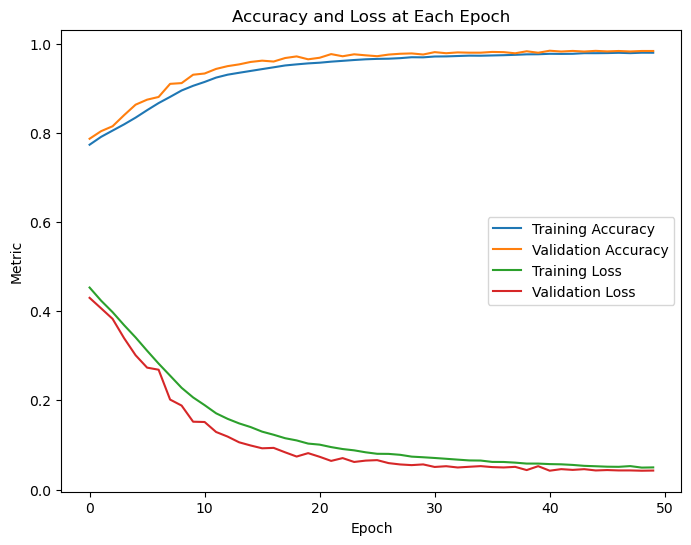

In [63]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(units=2048, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss=BinaryCrossentropy(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

epochs = 100 # You can adjust the number of epochs based on your dataset and convergence
batch_size = 32  # You can adjust the batch size as well
history = model.fit(train_X, train_Y, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Accuracy and Loss at Each Epoch')
plt.legend()
plt.show()

In [64]:
# Testing the ANN model
Y_predict = model.predict(test_X)
print(np.sqrt(mean_squared_error(test_Y,Y_predict)))
model.evaluate(test_X,test_Y)

229/229 [==============================] - 5s 8ms/step
0.1201572204727509
229/229 [==============================] - 2s 9ms/step - loss: 0.0468 - accuracy: 0.9786


[0.04677041992545128, 0.9785753488540649]

### HyperParameter Tuning
We did HyperParameter Tuning for the ANN model and we ended up with the above configuration of the model

In [66]:
from keras.models import save_model
save_model(model, 'model_ann2048_dp.h5')

C:\Users\hp\AppData\Local\Temp\ipykernel_7276\3424562900.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'model_ann2048_dp.h5')
